# Analysis for Maximum Temperature in Laos

In [11]:
# import necessary modules
import os, sys, glob
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# process linearly bias corrected excel files to create datframes for models and ensemble them
def excelfiles_df(model_names, path, scenarios, var):
    
    all_file_list= {model: sorted(glob.glob(path+model+'/*.xlsx')) for model in model_names}
    #all_file_list
    #filter raw files
    raw_files={m: [f for f in all_file_list[m] if var in f and 'raw' in f] for m in sorted(all_file_list.keys())}
    
    #filter other files
    other_files={n: [f for f in all_file_list[n] if var in f and 'raw' not in f] for n in sorted(all_file_list.keys())}
    
    #change sorted files into dataframe
    raw_dfs={m_name:{vari:pd.read_excel(file, index_col=0) for vari, file in zip(scenarios, m_data)} for m_name, m_data in raw_files.items()}
    other_dfs={n_name:{vari:pd.read_excel(file, index_col=0) for vari, file in zip(scenarios, n_data)} for n_name, n_data in other_files.items()}
    
    print(other_files)
    #concat into dataframes
    raw_df=pd.concat({
    k: pd.concat(v, axis=0).reset_index().rename(columns={'level_0': 'scenarios', 'level_1':'date'}).set_index('date') for k, v in raw_dfs.items() if len(v)>0
    }, axis=0).reset_index().rename(columns={'level_0':'models'}).set_index('date')
    
    other_df=pd.concat({
    k: pd.concat(v, axis=0).reset_index().rename(columns={'level_0': 'scenarios', 'level_1':'date'}).set_index('date') for k, v in other_dfs.items() if len(v)>0
    }, axis=0).reset_index().rename(columns={'level_0':'models'}).set_index('date')
    
    return raw_df, other_df

In [7]:
path= r'G:\CMIP6\Laos/'
scenarios=['historical', 'ssp126','ssp245','ssp585']
models=['BCC-CSM2-MR','Canesm5','GFDL-CM4','MRI-CSM2-0']

In [8]:
# extract files
tasmax_raw, corrected_tasmax= excelfiles_df(models, path, scenarios, 'tasmax')
tasmax_raw

{'BCC-CSM2-MR': ['G:\\CMIP6\\Laos/BCC-CSM2-MR\\tasmax_BCC-CSM2-MR_historical.xlsx', 'G:\\CMIP6\\Laos/BCC-CSM2-MR\\tasmax_BCC-CSM2-MR_ssp126.xlsx', 'G:\\CMIP6\\Laos/BCC-CSM2-MR\\tasmax_BCC-CSM2-MR_ssp245.xlsx', 'G:\\CMIP6\\Laos/BCC-CSM2-MR\\tasmax_BCC-CSM2-MR_ssp585.xlsx'], 'Canesm5': ['G:\\CMIP6\\Laos/Canesm5\\tasmax_Canesm5_historical.xlsx', 'G:\\CMIP6\\Laos/Canesm5\\tasmax_Canesm5_ssp126.xlsx', 'G:\\CMIP6\\Laos/Canesm5\\tasmax_Canesm5_ssp245.xlsx', 'G:\\CMIP6\\Laos/Canesm5\\tasmax_Canesm5_ssp585.xlsx'], 'GFDL-CM4': ['G:\\CMIP6\\Laos/GFDL-CM4\\tasmax_GFDL-CM4_historical.xlsx', 'G:\\CMIP6\\Laos/GFDL-CM4\\tasmax_GFDL-CM4_ssp245.xlsx', 'G:\\CMIP6\\Laos/GFDL-CM4\\tasmax_GFDL-CM4_ssp585.xlsx'], 'MRI-CSM2-0': ['G:\\CMIP6\\Laos/MRI-CSM2-0\\tasmax_MRI-CSM2-0_historical.xlsx', 'G:\\CMIP6\\Laos/MRI-CSM2-0\\tasmax_MRI-CSM2-0_ssp126.xlsx', 'G:\\CMIP6\\Laos/MRI-CSM2-0\\tasmax_MRI-CSM2-0_ssp245.xlsx', 'G:\\CMIP6\\Laos/MRI-CSM2-0\\tasmax_MRI-CSM2-0_ssp585.xlsx']}


,models,scenarios,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,...,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18,sub_19,sub_20,sub_21,sub_22
date,,,,,,,,,,,,,,,,,,,,,
1985-01-01,BCC-CSM2-MR,historical,18.295410,18.295410,22.978394,18.295410,22.978394,25.134308,22.266205,22.266205,...,22.266205,18.590851,26.660797,25.134308,22.266205,24.673920,24.673920,26.660797,26.660797,24.673920
1985-01-02,BCC-CSM2-MR,historical,19.916931,19.916931,21.996368,19.916931,21.996368,23.189240,21.868439,21.868439,...,21.868439,19.767334,23.435913,23.189240,21.868439,22.572296,22.572296,23.435913,23.435913,22.572296
1985-01-03,BCC-CSM2-MR,historical,21.263550,21.263550,23.340424,21.263550,23.340424,23.939362,22.740356,22.740356,...,22.740356,20.729889,24.445099,23.939362,22.740356,23.301971,23.301971,24.445099,24.445099,23.301971
1985-01-04,BCC-CSM2-MR,historical,20.283966,20.283966,23.844788,20.283966,23.844788,25.008545,22.070526,22.070526,...,22.070526,17.867462,25.942902,25.008545,22.070526,22.989441,22.989441,25.942902,25.942902,22.989441
1985-01-05,BCC-CSM2-MR,historical,15.792206,15.792206,17.007996,15.792206,17.007996,18.866486,18.105408,18.105408,...,18.105408,16.896912,20.432373,18.866486,18.105408,19.708374,19.708374,20.432373,20.432373,19.708374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,MRI-CSM2-0,ssp585,24.775055,24.775055,25.697144,24.775055,25.697144,26.113770,25.677521,25.677521,...,25.677521,25.537933,27.587616,26.113770,25.677521,27.633362,27.633362,27.587616,27.587616,27.633362
2100-12-28,MRI-CSM2-0,ssp585,26.066498,26.066498,26.700623,26.066498,26.700623,27.526672,27.485260,27.485260,...,27.485260,27.168457,29.057373,27.526672,27.485260,29.422943,29.422943,29.057373,29.057373,29.422943
2100-12-29,MRI-CSM2-0,ssp585,26.023560,26.023560,27.140381,26.023560,27.140381,28.100739,27.682373,27.682373,...,27.682373,26.871216,29.654602,28.100739,27.682373,29.398895,29.398895,29.654602,29.654602,29.398895


In [9]:
path= r'G:\CMIP6'
observed_temp= pd.read_excel(path+'/Laos/climate_ds.xlsx', sheet_name='tasmax', index_col=0)
observed_temp= observed_temp.applymap(lambda x: np.nan if type(x)==str else x )
observed_temp= observed_temp.loc['1985-01-01': '2014-12-31']

avg_observed_temp=pd.DataFrame(observed_temp.apply(lambda x: x.mean())).T
avg_observed_temp.index=['observed']


## calculate average for models
avg_models_tasmax = tasmax_raw[tasmax_raw.scenarios=="historical"].reset_index().set_index(['models','date']).groupby([
    pd.Grouper(level='models'),
    pd.Grouper(freq='Y', level='date')]).mean().groupby([
    pd.Grouper(level='models')
]).mean()
avg_models_tasmax

,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,sub_9,sub_10,...,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18,sub_19,sub_20,sub_21,sub_22
models,,,,,,,,,,,,,,,,,,,,,
BCC-CSM2-MR,27.371467,27.371467,28.012923,27.371467,28.012923,29.141765,28.542757,28.542757,28.542757,27.371467,...,28.542757,27.828949,30.023472,29.141765,28.542757,29.304784,29.304784,30.023472,30.023472,29.304784
Canesm5,25.437869,26.493480,27.609682,25.437869,27.609682,27.609682,27.609682,27.609682,27.609682,28.374277,...,27.609682,28.374277,27.609682,27.609682,27.609682,28.374277,27.609682,27.609682,27.609682,28.374277
GFDL-CM4,24.354377,24.830887,26.049976,26.049976,26.049976,28.419793,28.419793,28.419793,28.419793,24.830887,...,27.444877,27.444877,27.481000,28.419793,28.419793,28.138505,27.481000,27.481000,27.481000,28.138505
MRI-CSM2-0,25.167339,25.167339,26.253113,25.167339,26.253113,27.551050,27.234982,27.234982,27.234982,25.167339,...,27.234982,27.685323,29.443794,27.551050,27.234982,29.772506,29.772506,29.443794,29.443794,29.772506


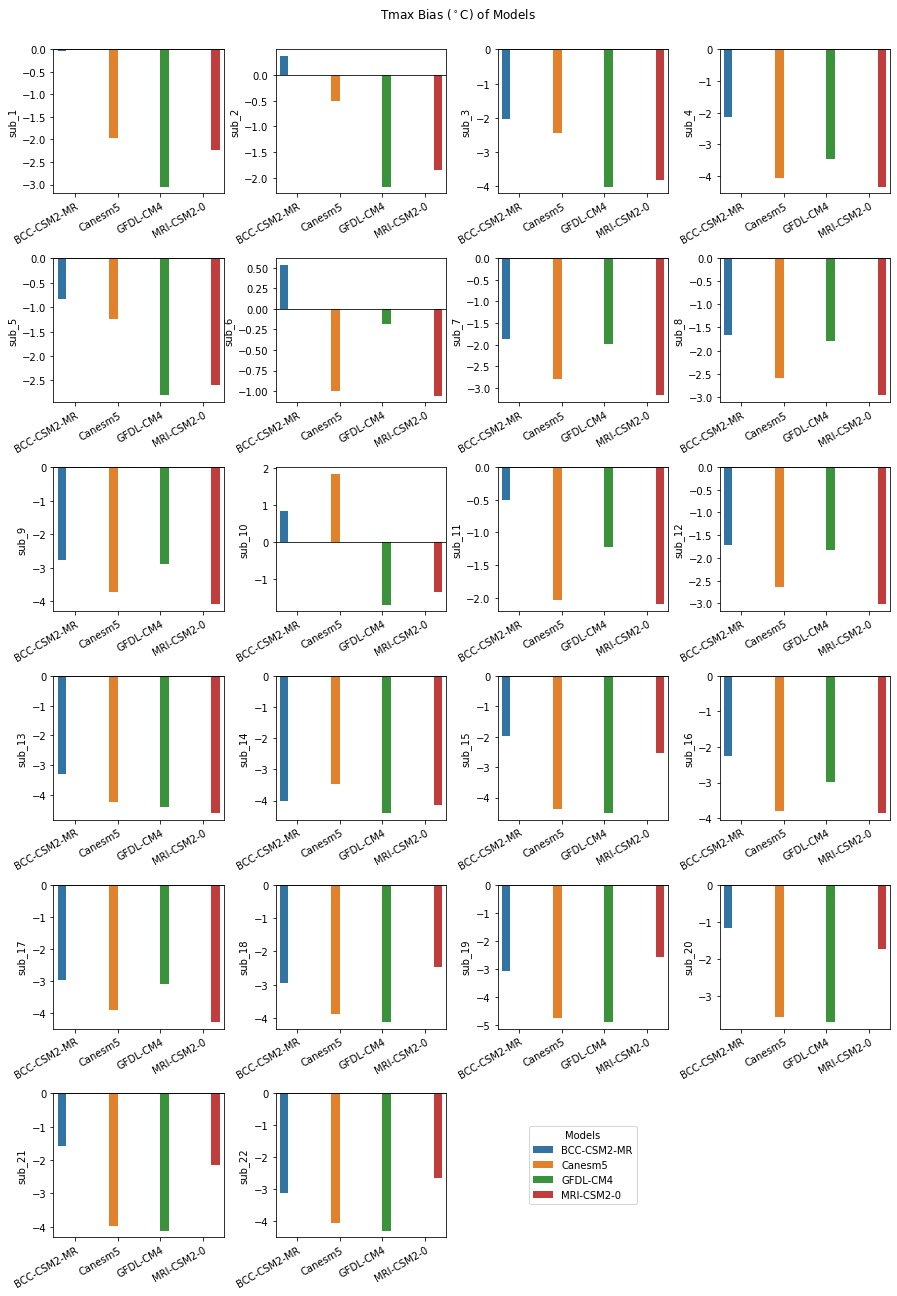

In [13]:
   
# calculate bias for maximum temperature

bias_models_tasmax= avg_models_tasmax.apply(lambda x: x- avg_observed_temp.squeeze(), axis=1). reset_index()#.melt(id_vars=['models'], var_name='Stations', value_name='bias(mm)')
#print(bias_models)
fig, axes= plt.subplots(nrows=6,ncols=4, figsize=(15,20))
fig.suptitle('Tmax Bias ($^\circ$C) of Models')

for i, ax in enumerate(axes.flatten()):
    
    if i<=21:
        g=sns.barplot(x='models', y=bias_models_tasmax.iloc[:,i+1],  data=bias_models_tasmax, hue= 'models', ax=ax)
        ax.set
        ax.legend([],[], frameon=False)
        handles, title=ax.get_legend_handles_labels()
        ax.tick_params(axis='x', labelsize=10)
        ax.axhline(0, ls='-', linewidth=0.8, color='k')
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")
    elif i==22:
       
        ax.legend(handles, title, loc='center', title="Models", fancybox=True)
        ax.set_visible(True)
        ax.axis('off')
    else:
        ax.set_visible(False)
    plt.subplots_adjust(top=0.95, hspace=0.45, wspace=0.3)
plt.savefig(path+'/Laos/Model_biases_tasmax.png', dpi=600)

In [14]:
tasmax_monthly = corrected_tasmax.groupby(['models','scenarios']).resample('M').mean().reset_index().set_index('date')
tasmax_monthly[(tasmax_monthly.scenarios=='historical') & (tasmax_monthly.models=='Canesm5') ]

,models,scenarios,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,...,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18,sub_19,sub_20,sub_21,sub_22
date,,,,,,,,,,,,,,,,,,,,,
1985-01-31,Canesm5,historical,22.272273,21.735308,24.990063,25.177079,23.841128,24.025956,25.225869,25.177235,...,26.866568,26.475040,27.785740,27.179407,27.060687,27.208901,28.063622,27.250375,27.461708,27.595933
1985-02-28,Canesm5,historical,24.596799,24.189099,27.051388,27.520376,25.876346,26.067480,27.184446,27.174552,...,28.749168,28.470822,29.844292,29.191718,29.093796,29.258590,30.006016,29.259097,29.556382,29.626867
1985-03-31,Canesm5,historical,25.697109,26.175162,29.422899,28.477055,28.244189,28.377232,29.529791,29.504684,...,31.017307,32.729108,31.862017,31.299673,31.225189,33.472205,32.102609,31.206673,31.532082,33.818108
1985-04-30,Canesm5,historical,29.481095,29.845512,31.475221,31.930728,30.230821,30.134010,31.725865,31.586532,...,33.230466,32.806902,33.549943,33.026588,33.034510,33.395046,33.977388,32.765588,33.129143,33.679757
1985-05-31,Canesm5,historical,26.498649,27.168780,28.724094,28.345595,27.420793,26.978803,29.113556,28.825664,...,30.500470,30.620333,30.219782,29.699363,29.836212,30.888967,30.714707,29.291771,29.728341,31.007656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-31,Canesm5,historical,29.462841,28.242909,30.637458,30.841938,29.391856,28.750587,31.115136,30.772921,...,32.364985,32.154274,31.974060,31.322082,31.626060,32.269435,32.382964,30.933415,31.582168,32.257811
2014-09-30,Canesm5,historical,28.868804,28.660080,29.655344,30.335026,28.444755,27.923289,29.997033,29.703533,...,31.177689,31.733244,30.782911,30.277878,30.475544,31.873966,31.192589,29.870633,30.339833,31.898922
2014-10-31,Canesm5,historical,29.510311,28.774729,31.094100,31.330397,29.908250,29.545508,31.439153,31.191788,...,32.751078,31.831508,32.545809,32.070809,32.175046,32.089369,32.979627,31.741820,32.082325,32.206100


In [15]:
ensemble_tasmax= (corrected_tasmax.reset_index()
           .groupby(['scenarios','date']).mean().reset_index().set_index('date')#generating ensemble
           .reset_index().groupby(['scenarios', 'date']).mean()
           .groupby([ pd.Grouper(level='scenarios'),    
            pd.Grouper(freq='M', level='date')]).mean().reset_index().set_index('date')
          )
#ens_col=["ensemble"]*len(ensemble.index)
ensemble_tasmax.insert(0, "models", ["ensemble"]*len(ensemble_tasmax.index))
ensemble_tasmax

,models,scenarios,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,...,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18,sub_19,sub_20,sub_21,sub_22
date,,,,,,,,,,,,,,,,,,,,,
1985-01-31,ensemble,historical,23.756556,23.033168,26.828106,26.203635,25.679170,25.528315,26.648064,26.599430,...,28.395220,28.173406,29.656263,28.681766,28.482881,29.386839,29.849689,29.120898,29.332231,29.773871
1985-02-28,ensemble,historical,25.839486,25.718592,29.923936,29.173654,28.748895,28.979993,29.812886,29.802992,...,31.430486,30.973961,32.832740,32.104231,31.722237,32.324168,32.733082,32.247545,32.544830,32.692444
1985-03-31,ensemble,historical,26.954239,26.872736,30.476972,29.696773,29.298262,29.453854,30.650583,30.625476,...,32.188106,32.539415,33.341332,32.376294,32.345981,33.812104,33.587192,32.685988,33.011396,34.158008
1985-04-30,ensemble,historical,29.532922,29.192078,31.979151,31.740367,30.734751,30.786198,32.591266,32.451933,...,34.271578,34.302358,34.629208,33.678775,33.899911,35.091577,35.217856,33.844853,34.208408,35.376288
1985-05-31,ensemble,historical,28.467605,28.241256,30.485189,30.088873,29.181888,28.607378,30.872425,30.584532,...,32.412953,32.561391,31.676630,31.327938,31.595081,32.521597,32.304950,30.748619,31.185189,32.640285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-31,ensemble,ssp585,33.608103,32.925756,35.301999,34.987200,34.056397,33.452634,35.908712,35.566497,...,37.158561,37.298101,36.607893,36.024128,36.419636,37.179631,37.131404,35.567248,36.216000,37.168007
2100-09-30,ensemble,ssp585,33.372465,33.362378,34.735640,34.838687,33.525051,33.165796,35.538798,35.245298,...,36.719454,37.656441,36.197813,35.520385,36.017309,37.406544,36.846354,35.285535,35.754735,37.431500
2100-10-31,ensemble,ssp585,31.090471,30.957387,33.371659,32.910557,32.185809,32.015892,33.901201,33.653835,...,35.213125,35.457807,35.262795,34.541193,34.637093,35.871112,35.770557,34.458806,34.799311,35.987843


In [16]:
# combine individual model tasmax and ensemble into one dataframe
all_tasmax=pd.concat([tasmax_monthly, ensemble_tasmax], axis=0)
all_tasmax

,models,scenarios,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,...,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18,sub_19,sub_20,sub_21,sub_22
date,,,,,,,,,,,,,,,,,,,,,
1985-01-31,BCC-CSM2-MR,historical,25.042650,24.832854,29.060503,27.947456,27.911567,27.804402,28.691026,28.642392,...,30.331725,29.788073,31.276323,30.957853,30.525843,30.760191,31.237492,30.740958,30.952291,31.147223
1985-02-28,BCC-CSM2-MR,historical,26.082085,25.832994,30.732669,29.005662,29.557628,29.661828,30.133621,30.123727,...,31.698343,30.463352,33.446463,32.786066,32.042971,32.485619,33.114073,32.861268,33.158553,32.853896
1985-03-31,BCC-CSM2-MR,historical,25.146240,24.866283,28.531773,27.926186,27.353063,27.911484,29.252411,29.227304,...,30.739927,30.700495,31.582052,30.833925,30.947809,31.616610,32.112470,30.926708,31.252117,31.962513
1985-04-30,BCC-CSM2-MR,historical,27.926868,27.552646,30.694045,30.376501,29.449645,29.881546,31.881913,31.742579,...,33.386513,33.262851,33.655056,32.774123,33.190557,33.929527,34.138427,32.870701,33.234256,34.214238
1985-05-31,BCC-CSM2-MR,historical,29.708270,29.208614,31.546868,31.555216,30.243567,29.845072,32.320449,32.032557,...,33.707363,34.020790,33.523956,32.565631,33.043105,34.001382,33.896490,32.595946,33.032516,34.120070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-31,ensemble,ssp585,33.608103,32.925756,35.301999,34.987200,34.056397,33.452634,35.908712,35.566497,...,37.158561,37.298101,36.607893,36.024128,36.419636,37.179631,37.131404,35.567248,36.216000,37.168007
2100-09-30,ensemble,ssp585,33.372465,33.362378,34.735640,34.838687,33.525051,33.165796,35.538798,35.245298,...,36.719454,37.656441,36.197813,35.520385,36.017309,37.406544,36.846354,35.285535,35.754735,37.431500
2100-10-31,ensemble,ssp585,31.090471,30.957387,33.371659,32.910557,32.185809,32.015892,33.901201,33.653835,...,35.213125,35.457807,35.262795,34.541193,34.637093,35.871112,35.770557,34.458806,34.799311,35.987843


<ipython-input-20-148e12cf7264>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensemble_tasmax_plot['month']= ensemble_tasmax_plot.index.month
<ipython-input-20-148e12cf7264>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensemble_tasmax_plot['month_name']=ensemble_tasmax_plot.month.apply(lambda x: calendar.month_abbr[x])


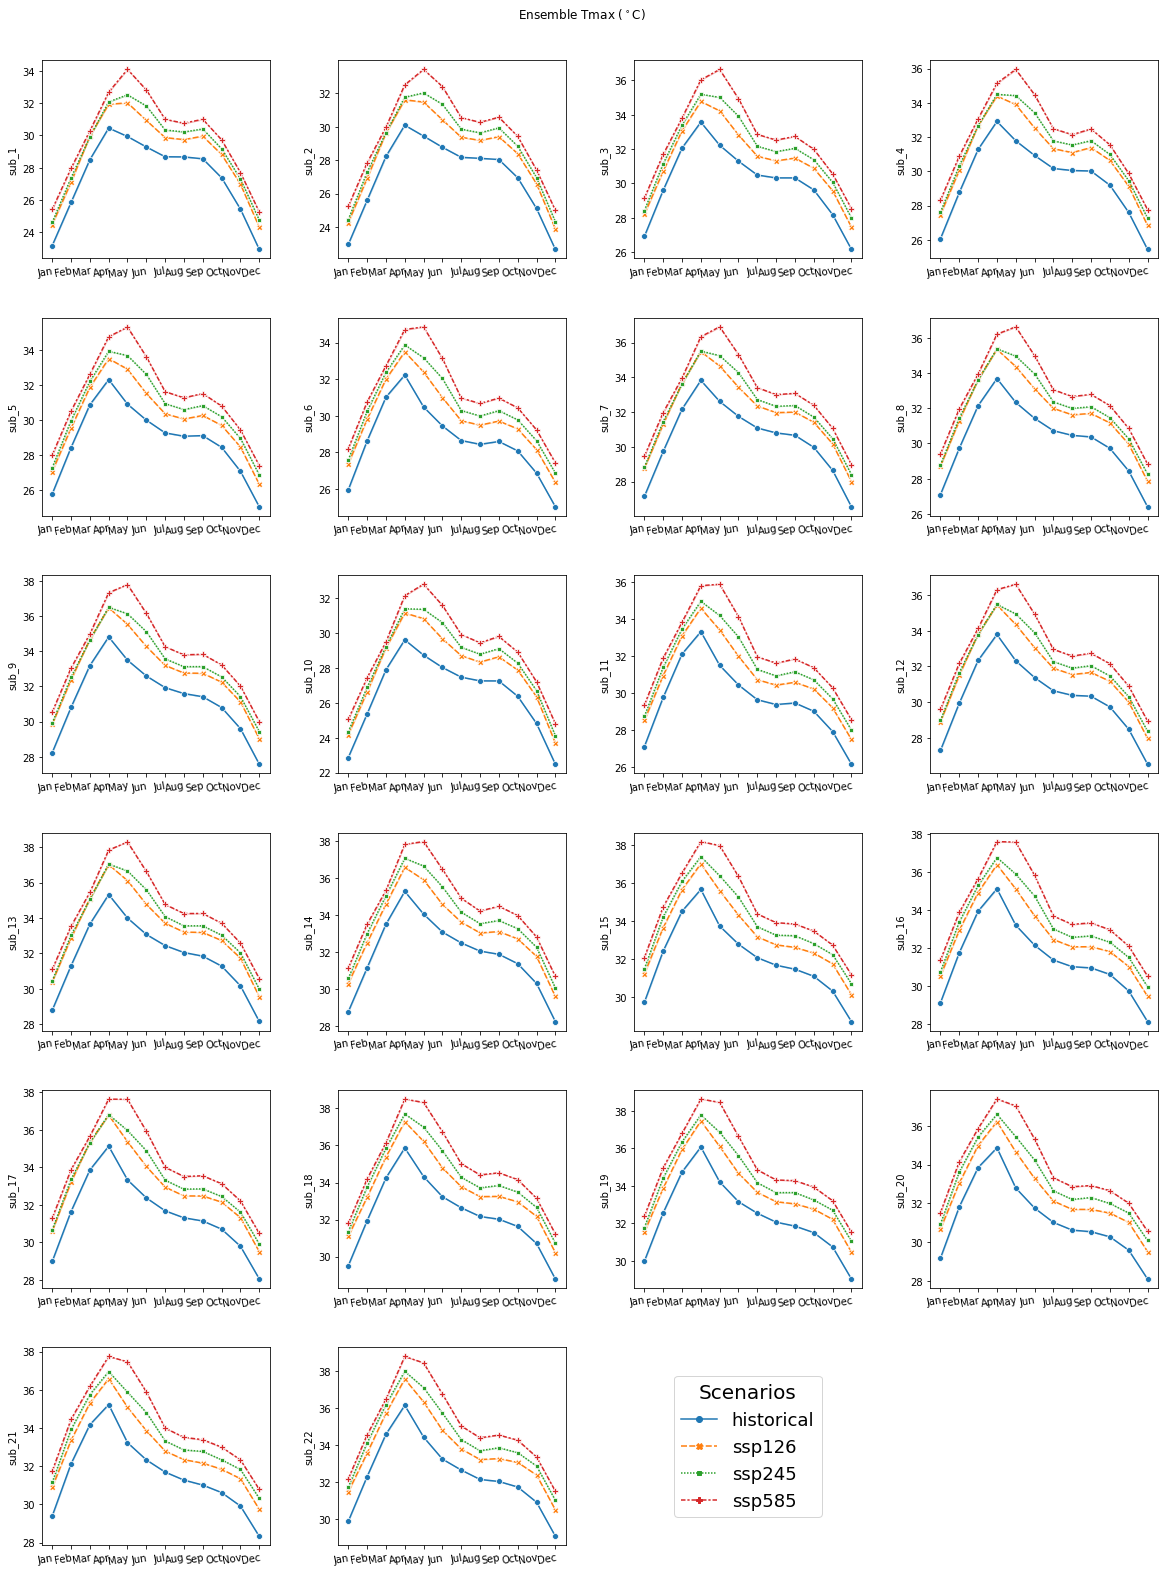

In [20]:
import calendar
fig_tasmax, axes_tasmax= plt.subplots(nrows=6, ncols=4, figsize=(20,25))
fig_tasmax.suptitle('Ensemble Tmax ($^\circ$C)')

ensemble_tasmax_plot= all_tasmax.loc[all_tasmax.models=='ensemble',:]
ensemble_tasmax_plot['month']= ensemble_tasmax_plot.index.month
ensemble_tasmax_plot['month_name']=ensemble_tasmax_plot.month.apply(lambda x: calendar.month_abbr[x])
for i, ax in enumerate(axes_tasmax.flatten()):
#sns.boxplot(x=pr_plt.index.month, y= pr_plt.iloc[:,1], hue='scenarios', data= pr_plt )
    #line=sns.lineplot(x=pr_plt.index.month, y=pr_plt.iloc[:,i+1], style='models', hue='models', data= pr_plt, ax=ax, legend=False, err_style='band')
    #line=sns.lineplot(x=historical_monthly.index.month, y=historical_monthly.iloc[:,i+1], style='models', hue='scenarios', data= historical_monthly, ax=ax, legend=False, err_style='band')
    if i<=21:
        sns.lineplot(x='month_name', y=ensemble_tasmax_plot.iloc[:,i+2], style='scenarios', hue='scenarios', data= ensemble_tasmax_plot, ax=ax, legend=True, markers=True, ci=1) 
        ax.set_xlabel('')
        handles, labels=ax.get_legend_handles_labels()
        #ax.tick_params(pad=10)
        ax.legend([],[], frameon=False)
        plt.setp(ax.get_xticklabels(), rotation=10, ha="right", fontsize=10,
         rotation_mode="anchor")
   
    elif i==22:
        
        ax.legend(handles, labels, loc='center', title="Scenarios", title_fontsize=20, fancybox=True, fontsize=18)
        ax.set_visible(True)
        ax.axis('off')
    else:
        ax.set_visible(False)
    plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
#line=sns.catplot(x=historical_monthly.index.month, y=historical_monthly.iloc[:,0:4], hue='scenarios', col='models', data= historical_monthly, kind="box")
#ax.legend()
    #sns.lineplot()
plt.savefig(path+'/Laos/Ensemble_tasmaxn.png', dpi=600)

NameError: name 'plot' is not defined

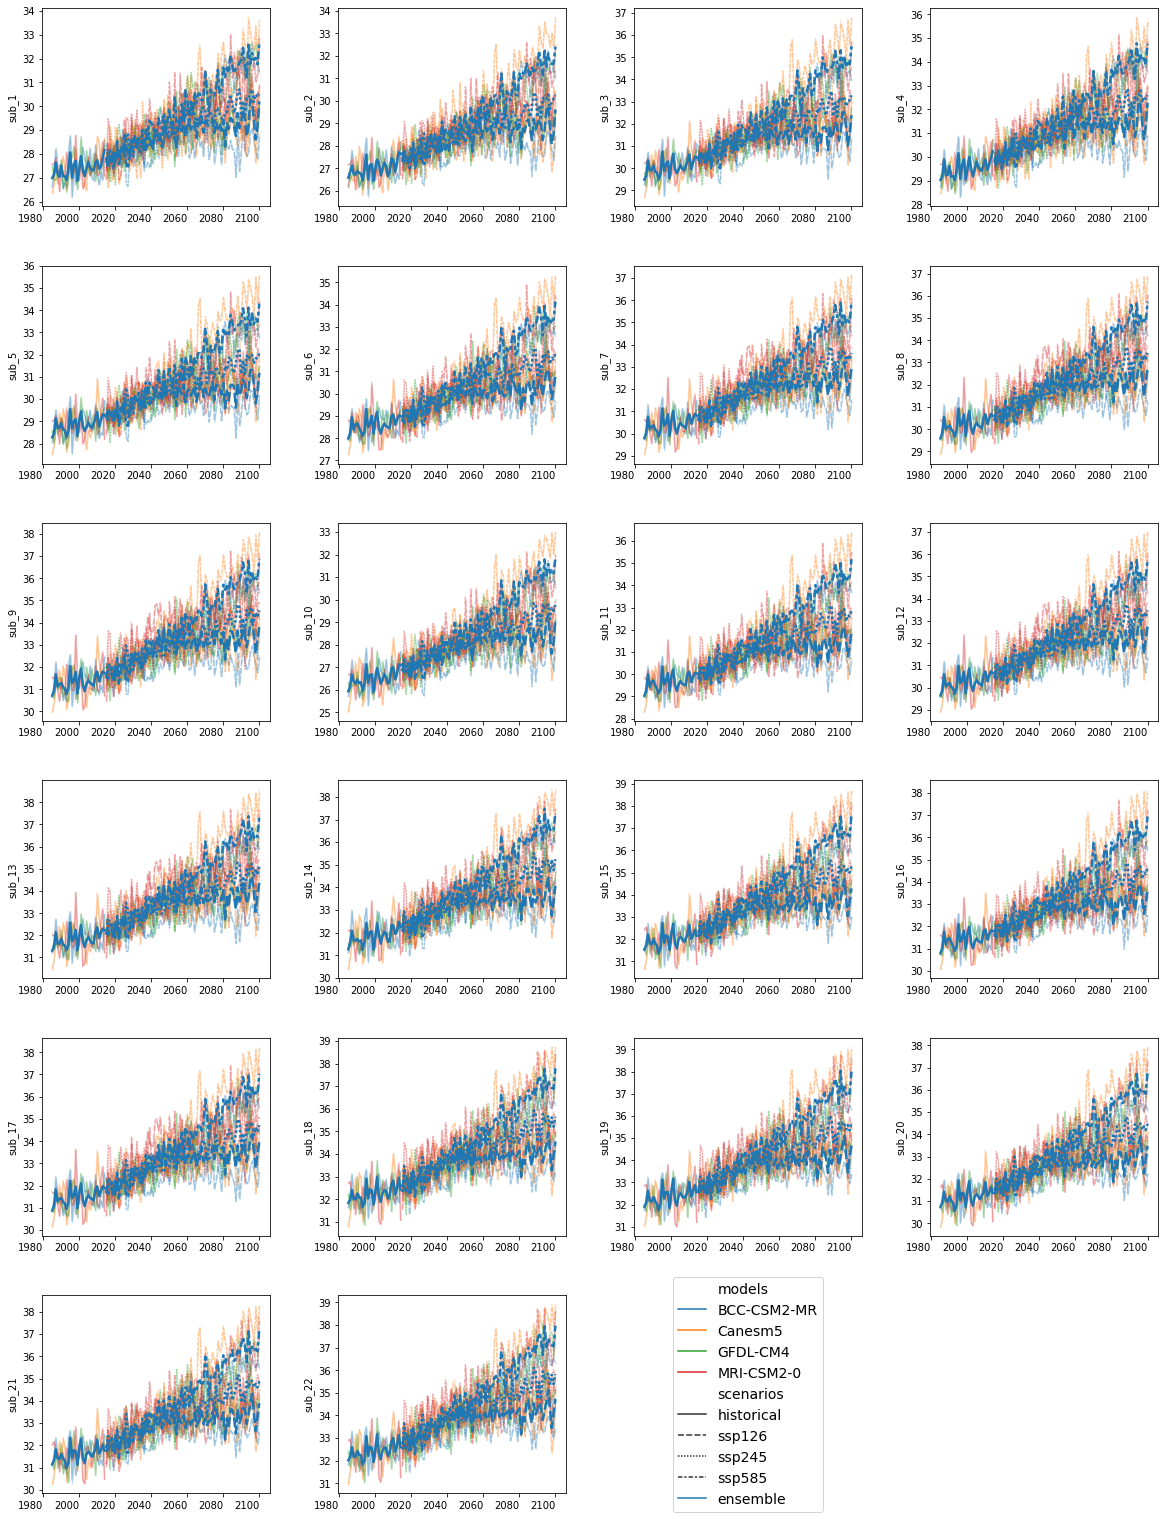

In [21]:

# plot annual plots
fig_tasmaxy, axes_tasmaxy= plt.subplots(nrows=6, ncols=4, figsize=(20,25))
fig_tasmax.suptitle('Tmax ($^\circ$C)')
without_ensemble= all_tasmax[all_tasmax.models!='ensemble']
for i, ax in enumerate(axes_tasmaxy.flatten()):
#sns.boxplot(x=pr_plt.index.month, y= pr_plt.iloc[:,1], hue='scenarios', data= pr_plt )
    #line=sns.lineplot(x=pr_plt.index.month, y=pr_plt.iloc[:,i+1], style='models', hue='models', data= pr_plt, ax=ax, legend=False, err_style='band')
    #line=sns.lineplot(x=historical_monthly.index.month, y=historical_monthly.iloc[:,i+1], style='models', hue='scenarios', data= historical_monthly, ax=ax, legend=False, err_style='band')
    if i<=21:
        sns.lineplot(x=without_ensemble.index.year, y=without_ensemble.iloc[:,i+2], style='scenarios', hue='models', data= without_ensemble, ax=ax, legend=True, markers=False, ci=1, alpha=0.3) 
        sns.lineplot(x=ensemble_tasmax_plot.index.year, y=ensemble_tasmax_plot.iloc[:,i+2], hue='models', style='scenarios', color='k', data= ensemble_tasmax_plot, ax=ax, legend=True, markers=False, ci=0.95, alpha=1, linewidth=2.5) 

        ax.set_xlabel('')
        handles, labels=ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        ax.legend([],[], frameon=False)
        plt.setp(ax.get_xticklabels(), rotation=0, ha="right", fontsize=10,
         rotation_mode="anchor")
    elif i==22:
        #by_label=dict(zip(labels, handles))
        ax.legend(*zip(*unique), loc='center', fancybox=True, fontsize=14)
        ax.set_visible(True)
        ax.axis('off')
    else:
        ax.set_visible(False)
    plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
#handles, labels= plt.gca().get_legend_handles_labels()
#by_label=dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='center', title="Scenarios", title_fontsize=20, fancybox=True, fontsize=18)
    #sns.lineplot()
plt.savefig(path+'/Laos/Ensemble_tasmax_annual.png', dpi=600)

In [22]:
basin_average= all_tasmax.reset_index().set_index(['date','models','scenarios']).mean(axis=1).reset_index().set_index('date').rename(columns={0:'basin_avg'})
basin_average

,models,scenarios,basin_avg
date,,,
1985-01-31,BCC-CSM2-MR,historical,29.089126
1985-02-28,BCC-CSM2-MR,historical,30.636161
1985-03-31,BCC-CSM2-MR,historical,29.369817
1985-04-30,BCC-CSM2-MR,historical,31.679063
1985-05-31,BCC-CSM2-MR,historical,32.071207
...,...,...,...
2100-08-31,ensemble,ssp585,35.526227
2100-09-30,ensemble,ssp585,35.298731
2100-10-31,ensemble,ssp585,33.796477


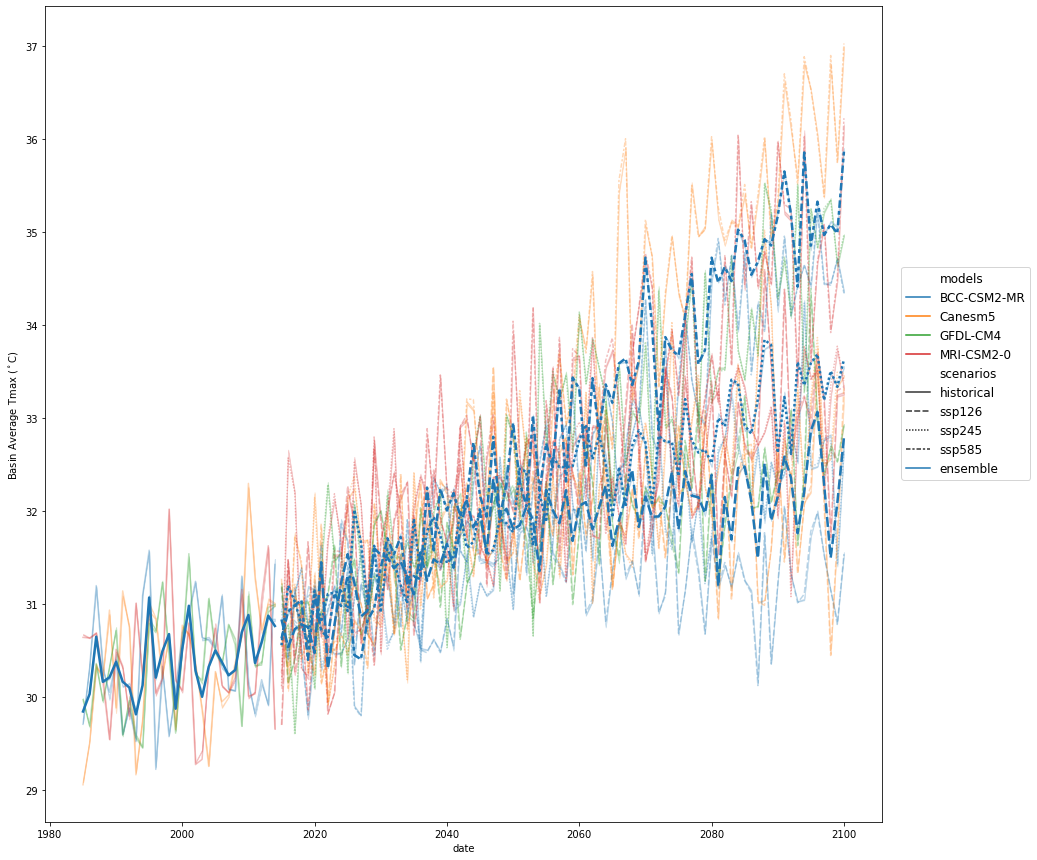

In [24]:
basin_avg_ens= basin_average.loc[basin_average.models=='ensemble']
basin_avg_models=basin_average.loc[basin_average.models!='ensemble']
figure= plt.figure(figsize=(15,15))
sns.lineplot(data= basin_avg_models, x=basin_avg_models.index.year, y='basin_avg', style='scenarios', hue='models',  markers=False, ci=0.95, alpha=0.3)
sns.lineplot(x=basin_avg_ens.index.year, y='basin_avg', hue='models', style='scenarios', color='k', n_boot=1000, data= basin_avg_ens,  markers=False, ci=0.95, alpha=1, linewidth=2.5) 

# plot only common legend
handles_ens, labels_ens= plt.gca().get_legend_handles_labels()
unique_leg = [(h, l) for i, (h, l) in enumerate(zip(handles_ens, labels_ens)) if l not in labels_ens[:i]]
#by_label=dict(zip(labels, handles))
plt.legend(*zip(*unique_leg), bbox_to_anchor=(1.1, 0.55), loc='center', fontsize=12)
plt.ylabel('Basin Average Tmax ($^\circ$C)')
plt.savefig(path+'/Laos/basin_avg_tasmax.png', dpi=600)
plt.show()

In [29]:
#prepare dataset to process in gis
stations = pd.read_excel('./Laos/stations.xlsx', sheet_name='stations', header=0)
stations=stations.rename(columns={'Lat':'lat', 'Lon':'lon'})
new_stns= stations.rename(columns={'Name':'Stations'})
new_stns
tasmax_combined=ensemble_tasmax_plot.drop(columns=['month','month_name','models']).reset_index().melt(id_vars=['date','scenarios'], 
        var_name="Stations", 
        value_name="tasmax").set_index('date')
tasmax_combined




,scenarios,Stations,tasmax
date,,,
1985-01-31,historical,sub_1,23.756556
1985-02-28,historical,sub_1,25.839486
1985-03-31,historical,sub_1,26.954239
1985-04-30,historical,sub_1,29.532922
1985-05-31,historical,sub_1,28.467605
...,...,...,...
2100-08-31,ssp585,sub_22,37.168007
2100-09-30,ssp585,sub_22,37.431500
2100-10-31,ssp585,sub_22,35.987843


In [30]:
# now add stations coordinates and make it annua timeseries
tasmax_withstations= (tasmax_combined.merge(new_stns, on='Stations', how='left').set_index(tasmax_combined.index)
                      .groupby([pd.Grouper('scenarios'),
                                pd.Grouper('Stations'),
                                pd.Grouper(level='date', freq='Y')]).mean().reset_index().set_index('date'))
tasmax_withstations

,scenarios,Stations,tasmax,Subbasin,lat,lon
date,,,,,,
1985-12-31,historical,sub_1,26.993271,1,20.042009,102.641786
1986-12-31,historical,sub_1,27.132961,1,20.042009,102.641786
1987-12-31,historical,sub_1,27.631434,1,20.042009,102.641786
1988-12-31,historical,sub_1,27.168074,1,20.042009,102.641786
1989-12-31,historical,sub_1,27.034385,1,20.042009,102.641786
...,...,...,...,...,...,...
2096-12-31,ssp585,sub_9,36.313006,9,18.611154,102.397761
2097-12-31,ssp585,sub_9,35.873734,9,18.611154,102.397761
2098-12-31,ssp585,sub_9,36.019295,9,18.611154,102.397761


In [31]:
def add_period(df):
    
    nearfuture=pd.date_range("2015-12-31",'2044-12-31')
    midfuture=pd.date_range("2045-12-31",'2074-12-31')
    farfuture=pd.date_range("2075-12-31",'2100-12-31')
    
    periods=[nearfuture, midfuture, farfuture]
    scenarios=df.scenarios.unique().tolist()
    
    conditions=[(df['scenarios']=='historical')]
    for scenario in scenarios[1:]:
        for period in periods:
            conditions.append(
                (df.index.isin(period)) & (df['scenarios']==scenario)
            )
    #print (conditions)
    values=['historical','nearfuture_ssp126','midfuture_ssp126','farfuture_ssp126','nearfuture_ssp245','midfuture_ssp245',
           'farfuture_ssp245', 'nearfuture_ssp585', 'midfuture_ssp585','farfuture_ssp585']
    
    df['period']=np.select(conditions, values)
    
    return df
            
tasmax_period=add_period(tasmax_withstations)

In [33]:
   

tasmax_periodicmean=tasmax_period.reset_index().groupby(['period','lat','lon'], sort=False).mean().reset_index()
#create new column
col_dict={col: col_val for col_val, col  in enumerate(tasmax_periodicmean.period.unique())}
#
tasmax_periodicmean['col']=tasmax_periodicmean['period'].map(col_dict)
tasmax_periodicmean.sort_values('col')
#tasmax_togis=pd.pivot_table(tasmax_periodicmean, values='Rain', index=['lat','lon'], columns=['period'], sort=False)
tasmax_togis= tasmax_periodicmean.groupby(['lat', 'lon','period'], sort=False)['tasmax'].mean().unstack('period')
tasmax_togis

,period,historical,nearfuture_ssp126,midfuture_ssp126,farfuture_ssp126,nearfuture_ssp245,midfuture_ssp245,farfuture_ssp245,nearfuture_ssp585,midfuture_ssp585,farfuture_ssp585
lat,lon,,,,,,,,,,
20.042009,102.641786,27.401102,28.261233,29.033567,29.290029,28.315809,29.361314,30.067107,28.347241,29.933554,31.637670
19.095877,102.881539,26.515115,27.336525,28.166219,28.363533,27.452911,28.450945,29.221437,27.451893,29.083436,30.869904
18.549799,101.371677,29.659019,30.444344,31.113374,31.316640,30.581216,31.566210,32.388929,30.566988,32.264079,34.071670
18.800038,101.832668,30.262403,31.132769,32.038290,32.227477,31.216008,32.171005,33.017010,31.190768,32.885082,34.679848
18.253983,102.602359,31.842378,32.717675,33.627470,33.805267,32.784786,33.759232,34.602066,32.770748,34.465063,36.259829
18.097078,103.062210,31.849364,32.692439,33.394101,33.529640,32.817942,33.834847,34.683456,32.810190,34.504825,36.251659
17.865180,101.570998,31.999859,32.835582,33.504978,33.705782,32.944048,33.999573,34.828755,32.943775,34.651230,36.446983
18.119955,101.383037,31.418692,32.204017,32.873047,33.076313,32.340889,33.325883,34.148602,32.326660,34.023752,35.831342
18.104735,101.975554,31.504217,32.374583,33.280104,33.469291,32.457822,33.412819,34.258824,32.432581,34.126896,35.921662


In [34]:
# change to required gistool format
cols= ['year_'+str(i) for i in range(10)]
tasmax_togis.columns= cols
tasmax_gisformat = tasmax_togis.reset_index()
tasmax_gisformat.to_csv(path+'/Laos/tasmax_period.csv')

In [36]:
import rioxarray
xr_tasmax = rioxarray.open_rasterio(r'G:\CMIP6\Laos\tasmax/tasmax_all.tif').rio.reproject("EPSG:4326").drop('spatial_ref')
xr_tasmax= xr_tasmax.where(xr_tasmax!=xr_tasmax.min(), np.nan)

In [37]:
period=['historical','nearfuture_ssp126','midfuture_ssp126','farfuture_ssp126','nearfuture_ssp245','midfuture_ssp245',
           'farfuture_ssp245', 'nearfuture_ssp585', 'midfuture_ssp585','farfuture_ssp585']
xr_tasmax=xr_tasmax.assign_coords(band=period)
#xr_tasmax.drop('period')
xr_tasmax

<xarray.DataArray (band: 10, y: 1120, x: 1050)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x        (x) float64 100.8 100.8 100.9 100.9 ... 103.7 103.7 103.8 103.8
  * y        (y) float64 20.26 20.26 20.25 20.25 ... 17.17 17.16 17.16 17.16
  * band     (band) <U17 'historical' 'nearfuture_ssp126' ... 'farfuture_ssp585'
Attributes:
    STATISTICS_COVARIANCES:  2.34054727135275,2.34506872169766,2.318041104707...
    STATISTICS_MAXIMUM:      32.439666748047
    STATISTICS_MEAN:         30.183200374707
    STATISTICS_MINIMUM:      26.515121459961
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.5298847248576
    scale_factor:            1.0
    add_offset:              0.0
    grid_mapping:            spatial_ref
    _FillValue:              -3.4028235e+38

In [38]:
# calculate changes in precipitation distribution
period_array=xr_tasmax.band.values
change_tasmax={per: (xr_tasmax.sel(band=per)- xr_tasmax.sel(band='historical')) for per in period_array[1:]}
change_tasmax=xr.concat([change_ds.expand_dims({'abs_change': [period_names]} ) for period_names, change_ds in change_tasmax.items()], dim='abs_change' )

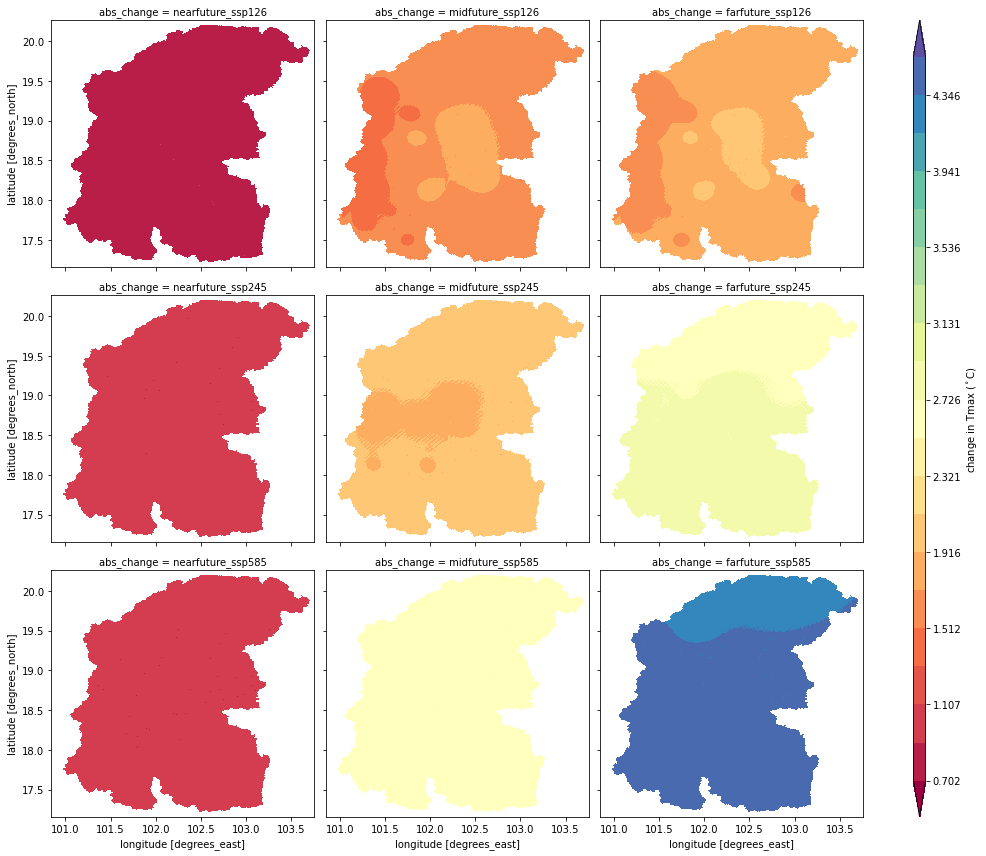

In [41]:
xr.plot.pcolormesh(change_tasmax, x='x', y='y',  figsize=(15,12), col='abs_change', col_wrap=3, vmin=change_tasmax.min(), vmax= change_tasmax.max(), cmap='Spectral', extend='both', levels=20,  cbar_kwargs={'aspect':60, 'label':'change in Tmax ($^\circ$C)'})
plt.savefig(path+'/Laos/CMIP6_ensemble_tasmaxchange.png', dpi=600)

running subpots:   9%|██████                                                            | 1/11 [00:00<00:01,  8.70it/s]

GridSpec(3, 4)


running subpots: 100%|█████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  9.57it/s]
<ipython-input-47-fe53c32803e0>:49: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(plotd, cax=cbar_ax, ax= new_axs_list, aspect=50, extend='both', cmap='RdBu_r', fraction=0.05, anchor=(1,0.5))


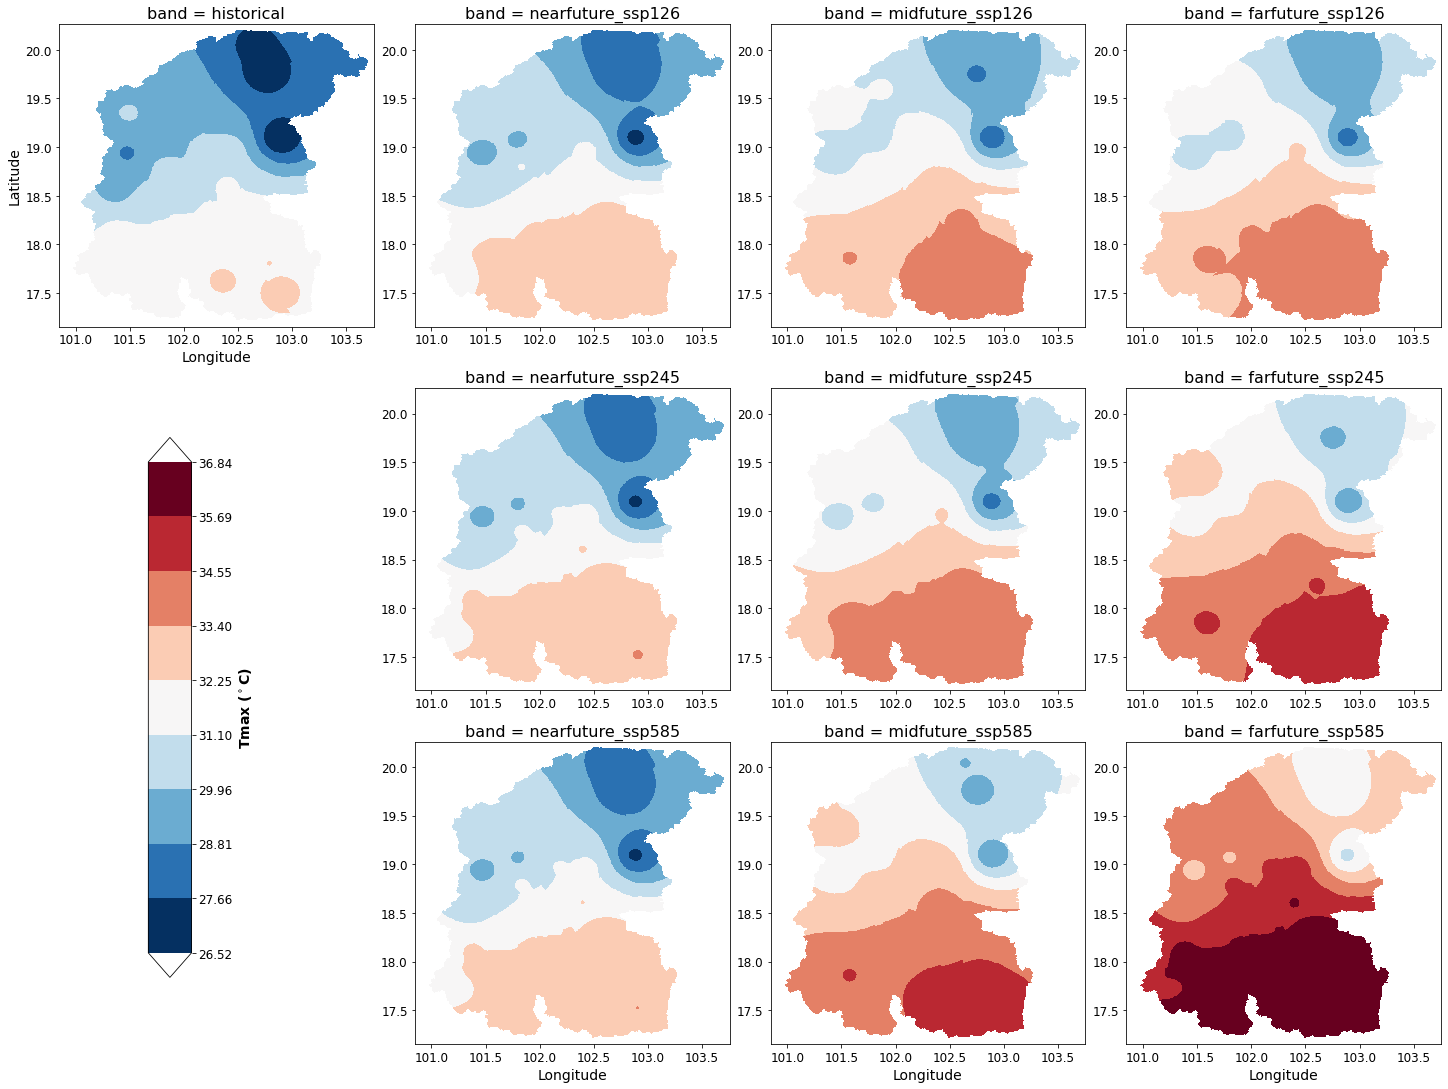

In [47]:
#final_processed_ds= final_processed_ds.drop('spatial_ref')
#set fontsize
from tqdm import tqdm
import matplotlib
font = {'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
plt.rc('axes', titlesize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
#plt.rcParams['font.size']=10


fig, axes= plt.subplots(ncols=4, nrows=3, figsize=(20,15), constrained_layout =True)
axes_names= xr_tasmax.band.values
gs=axes[0,0].get_gridspec()
print(gs)
for ax in axes[1:,0]:
    ax.remove()
bigax=fig.add_subplot(gs[1:,0])
bigax.set_visible(False)

new_ax_names=axes_names.tolist()
for pos in [4, 8]:
    new_ax_names.insert(pos,'em')
new_ax_names

axes_dict={name: ax for name, ax in zip(new_ax_names, axes.flatten())}
new_axs_list=[]
cbar_ax= fig.add_axes([0.1,0.098, 0.03,0.5])

for p, ax in tqdm(axes_dict.items(), desc='running subpots'):
    if p!='em':
        plotd=xr.plot.pcolormesh(xr_tasmax.sel(band=p), x='x', y='y', vmin= xr_tasmax.min(),vmax=xr_tasmax.max(), ax=ax,add_colorbar=False, cmap='RdBu_r', levels=10)
        new_axs_list.append(ax)
        
    if p=='historical' :
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_ylabel('Latitude', fontsize=14)
    elif 'ssp585' in p:
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_ylabel('')
    elif p=='near_future_ssp245':
        ax.set_ylabel('Latitude', fontsize=14)
        ax.set_xlabel('')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')
cb=fig.colorbar(plotd, cax=cbar_ax, ax= new_axs_list, aspect=50, extend='both', cmap='RdBu_r', fraction=0.05, anchor=(1,0.5))
cb.set_label(label='Tmax ($^\circ$C)', size=14, weight='bold')
plt.savefig(path+'/Laos/spatial_tasmax.png', dpi= 600)

In [72]:
xr_tasmax.min()

<xarray.DataArray ()>
array(31.09246445)